<i>This notebook is made by Haozhe TANG on 11, May for the data exploration of Recommender System.</i>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import seaborn as sns

#Sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import (LabelEncoder,
                                  MinMaxScaler)

#Graphic library
from wordcloud import WordCloud

# 1. Data Importing & Data Exploration

In [2]:
df_inter = pd.read_csv('ML_interactions.csv')
df_item = pd.read_csv('ML_items.csv')
df_user = pd.read_csv('ML_users.csv')

In [3]:
df_inter.head()

,UserId,MovieId,Ratings,Timestamps
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df_item.head()

,Id,Title,ReleaseDate,VideoReleaseDate,URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df_user.head()

,Id,Age,Sex,Occupation,Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
#Data Preview
print(df_inter.info())
print(df_item.info())
print(df_user.info())b

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   UserId      100000 non-null  int64
 1   MovieId     100000 non-null  int64
 2   Ratings     100000 non-null  int64
 3   Timestamps  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1682 non-null   int64  
 1   Title             1682 non-null   object 
 2   ReleaseDate       1681 non-null   object 
 3   VideoReleaseDate  0 non-null      float64
 4   URL               1679 non-null   object 
 5   unknown           1682 non-null   int64  
 6   Action            1682 non-null   int64  
 7   Adventure         1682 non-null   int64  
 8   Animation         1682 non

Item dataset has missing values. <br/>
In columns **{'ReleaseDate', 'VideoReleaseDate', 'URL'}**

In [7]:
#Missing value
print(df_item.isnull().sum())
print(df_item.shape)



Id                     0
Title                  0
ReleaseDate            1
VideoReleaseDate    1682
URL                    3
unknown                0
Action                 0
Adventure              0
Animation              0
Children's             0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
dtype: int64
(1682, 24)


So we can see that **column 4 (VideoReleaseDate) has values are all missing**, so we decide to **delete this column**; <br/>
While the two other columns which have missing values, because of the small scale, we try to delete the line.

In [ ]:
#Duplicate
print(df_inter.duplicated().sum())
print(df_item.duplicated().sum())
print(df_user.duplicated().sum())


**No duplicate for these three datasets.**

In [9]:
#Outliers z-score
#inter dataset
inter_col = df_inter.columns
mean_inter = df_inter[inter_col].mean()
std_inter = df_inter[inter_col].std()
z_score_inter = abs(df_inter[inter_col] - mean_inter) / std_inter

#Item dataset
df_item_num = df_item.drop(['Title','ReleaseDate', 'VideoReleaseDate', 'URL'], axis=1)
mean_item = df_item.mean()
std_item = df_item.std()
z_score_item = abs(df_item_num - mean_item) / mean_item

/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_9897/3706589000.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_item = df_item.mean()
/var/folders/q7/h0qy2kmn1617pwg3_l5zhc7c0000gn/T/ipykernel_9897/3706589000.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_item = df_item.std()


In [10]:
z_score_inter.head()

,UserId,MovieId,Ratings,Timestamps
0,0.999514,0.554810,0.470705,0.426266
1,1.037021,0.373430,0.470705,1.532394
2,1.652142,0.146706,2.247419,0.868612
3,0.819478,1.132201,1.359062,0.546783
4,1.112036,0.240419,2.247419,0.536830


In [11]:
z_score_item.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Id,Musical,Mystery,Romance,Sci-Fi,Thriller,VideoReleaseDate,War,Western,unknown
0,1.000000,1.000000,39.047619,12.786885,2.330693,1.000000,1.0,1.00,1.0,1.0,...,0.998812,1.0,1.0,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
1,5.701195,11.459259,1.000000,1.000000,1.000000,1.000000,1.0,1.00,1.0,1.0,...,0.997623,1.0,1.0,1.0,1.0,5.701195,NaN,1.0,1.0,1.0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.00,1.0,1.0,...,0.996435,1.0,1.0,1.0,1.0,5.701195,NaN,1.0,1.0,1.0
3,5.701195,1.000000,1.000000,1.000000,2.330693,1.000000,1.0,1.32,1.0,1.0,...,0.995247,1.0,1.0,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
4,1.000000,1.000000,1.000000,1.000000,1.000000,14.431193,1.0,1.32,1.0,1.0,...,0.994058,1.0,1.0,1.0,1.0,5.701195,NaN,1.0,1.0,1.0


In [12]:
#z-score validation
#inter dataset
#z>3
print(df_inter[z_score_inter>4].count())
#z<-3
print(df_inter[z_score_inter<-4].count())

#item dataset
#z>3
print(df_item[z_score_item>4].count())
#z<-3
print(df_item[z_score_item<-4].count())

UserId        0
MovieId       0
Ratings       0
Timestamps    0
dtype: int64
UserId        0
MovieId       0
Ratings       0
Timestamps    0
dtype: int64
Id                    0
Title                 0
ReleaseDate           0
VideoReleaseDate      0
URL                   0
unknown               2
Action              251
Adventure           135
Animation            42
Children's          122
Comedy                0
Crime               109
Documentary          50
Drama                 0
Fantasy              22
Film-Noir            24
Horror               92
Musical              56
Mystery              61
Romance             247
Sci-Fi              101
Thriller            251
War                  71
Western              27
dtype: int64
Id                  0
Title               0
ReleaseDate         0
VideoReleaseDate    0
URL                 0
unknown             0
Action              0
Adventure           0
Animation           0
Children's          0
Comedy              0
Crime          

We can find there are a lot of upper outliers (numerical)in **item dataset** which have the **z-score bigger than 4**. We decide to replace them with the **upper cutoff**.

In [13]:
#Categorical Outliers
#inter dataset
df_user['Occupation'].value_counts()


student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: Occupation, dtype: int64

So we decide to merge occupations lower than **20 users** into **"others"**.

# 2. Data Preprocessing

## 2.1 Missing Value

In [14]:
#Delete feature "VideoReleaseDate"
df_item = df_item.drop(['VideoReleaseDate'], axis=1)
#Delete rows with null values.
df_item = df_item.dropna()

## 2.2 Outliers

After observation, we found that all numerical features have only binary values, which means the outliers is not actually means out of scale. <br/>

So we only to do **value mapping** to categorical features.

In [15]:
df_user_use = df_user.copy()
df_user_use['Occupation'] = df_user['Occupation'].replace({
    'entertainment': 'other',
    'healthcare': 'other',
    'retired': 'other',
    'lawyer': 'other',
    'salesman': 'other',
    'none': 'other',
    'homemaker':'other',
    'doctor':'other'
})
df_user_use['Occupation'].value_counts()

other            200
student          196
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
Name: Occupation, dtype: int64

## 2.3 Encoding

Except for user dataset, the two other datasets don't need to do **encoding process**. <br/>
For user dataset, we encode **occupation and sex (two categorical features)** with **labelencoder**;
and we encode **age (a numerical feature)** with **MinMaxScaler**.

In [16]:
# Do LabelEncoder to 'Occupation'and 'sex' feature of "user" dataset.
le = LabelEncoder()
df_user_use['Occupation'] = le.fit_transform(df_user_use['Occupation'])
df_user_use['Sex'] = le.fit_transform(df_user_use['Sex'])

#Do MinmaxEncoder to 'Age' feature of 'user' dataset
mme = MinMaxScaler()
df_user_use['Age'] = mme.fit_transform(df_user_use[['Age']])
df_user_use.head()

,Id,Age,Sex,Occupation,Code
0,1,0.257576,1,11,85711
1,2,0.696970,0,7,94043
2,3,0.242424,1,12,32067
3,4,0.257576,1,11,43537
4,5,0.393939,0,7,15213


# 3. Data Visualization

In [17]:
df_inter.head()

,UserId,MovieId,Ratings,Timestamps
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [18]:
df_item.head()

,Id,Title,ReleaseDate,URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
df_user.head()

,Id,Age,Sex,Occupation,Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## 3.1 Visualizatin on Interacting dataset|

### 3.1.1 Rating ratio

In [42]:
textprops={'fontsize': 15}

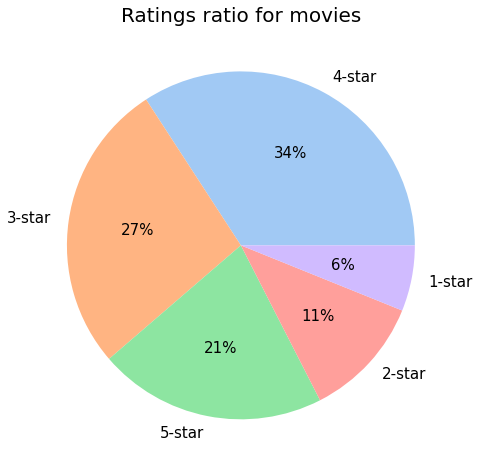

In [20]:
plt.figure(figsize=(8, 8))
plt.title('Ratings ratio for movies', fontsize=20)

rating = df_inter['Ratings'].value_counts()
data = rating.values
labels = list()
for index in rating.index:
    labels.append(str(index) + '-star')

colors=sns.color_palette('pastel')[0:5]

plt.pie(x=data, labels=labels, colors=colors, autopct='%.0f%%', textprops=textprops)
plt.show()

We can see from the pie chart that ***over half (55%)** of the movies are noted as **good (have/over 4-star)** by audiences. <br/>
On the contrary, **few people(6%) rated movies as **bad (with only 1-star)**

## 3.2 Visualization on Item dataset

### 3.2.1 Movie target ? Children OR Adults?

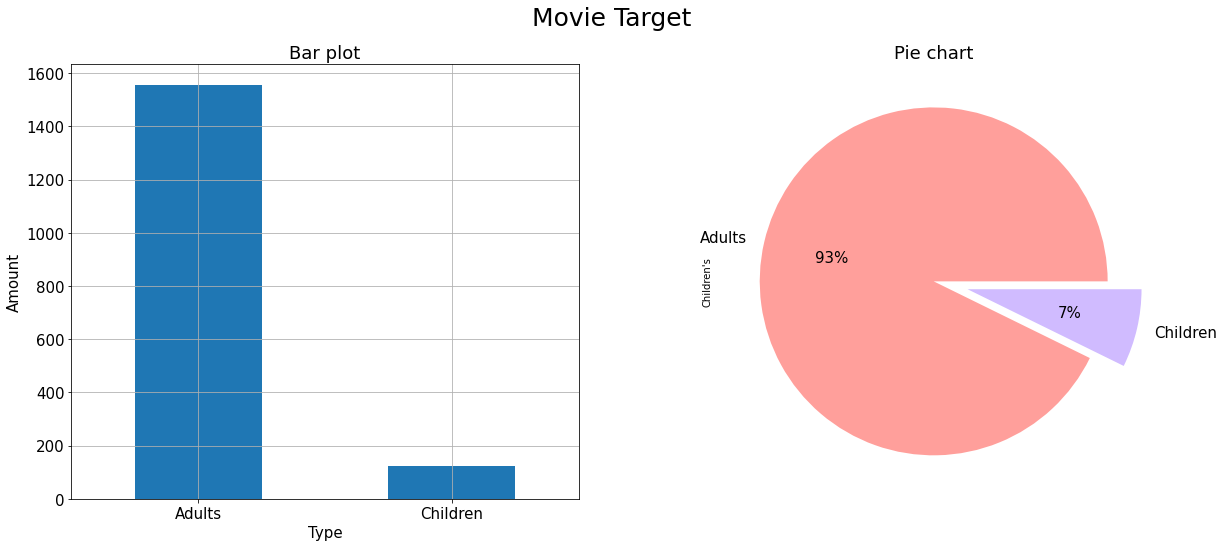

In [90]:
is_child = df_item["Children's"].value_counts()
labels = ['Adults', 'Children']
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Movie Target', fontsize=25)

#Barplot
axs[0].set_title('Bar plot', fontsize=18)
is_child.plot.bar(ax = axs[0])
x = range(len(labels))
axs[0].grid("on")
axs[0].set_xlabel('Type', fontsize=15)
axs[0].set_ylabel('Amount', fontsize=15)
axs[0].set_xticks(x, labels)
axs[0].tick_params(labelsize=15, rotation=0)

#Pie chart
axs[1].set_title('Pie chart', fontsize=18)
colors=sns.color_palette('pastel')[3:5]
is_child.plot.pie(ax = axs[1], colors=colors, labels=labels, textprops=textprops, autopct='%.0f%%', explode=[0, 0.2])


plt.show()

We can discover that there are not so many movies for **children (only 7%)**.

### 3.2.2 Types of movies (Wordcloud)

In [22]:
sum_type = list()
title_type = df_item.columns[4:]
for col in df_item.columns[4:]:
    sum_type.append(sum(df_item[col]))

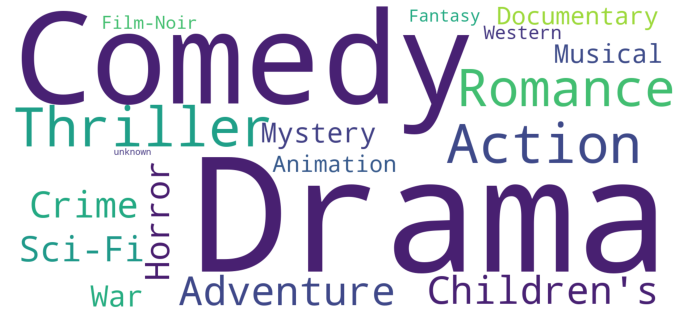

In [23]:
wc = WordCloud(max_words=30, 
               width=1500,
               height=700,
              background_color='white',
              random_state=42).generate_from_frequencies(dict(zip(title_type, sum_type)))

plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')
plt.show()

From the wordcloud, **comedy** and **drama** are the most common types of movies.

## 3.3 Visualization on user dataset

### 3.3.1 Occupation type

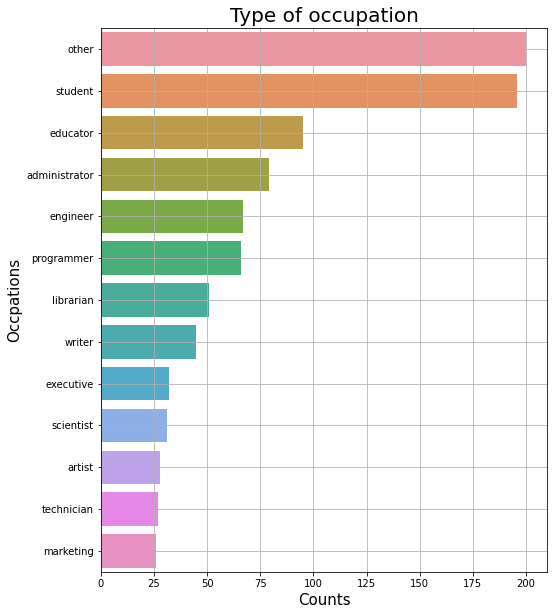

In [92]:
plt.figure(figsize=(8, 10))
occ_label = ['other',
             'student',
             'educator',
            'administrator',
            'engineer',
            'programmer',
            'librarian',
            'writer',
            'executive',
            'scientist',
            'artist',
            'technician',
            'marketing']

ax = sns.barplot(x=df_user_use['Occupation'].value_counts().values, y=occ_label, orient='h')
ax.set_title('Type of occupation', fontsize= 20)
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Occpations', fontsize=15)
ax.grid('on')

In [32]:
df_user_use

,Id,Age,Sex,Occupation,Code
0,1,0.257576,1,11,85711
1,2,0.696970,0,7,94043
2,3,0.242424,1,12,32067
3,4,0.257576,1,11,43537
4,5,0.393939,0,7,15213
...,...,...,...,...,...
938,939,0.287879,0,10,33319
939,940,0.378788,1,0,02215
940,941,0.196970,1,10,97229
941,942,0.621212,0,5,78209


### 3.3.2 Gender distribution

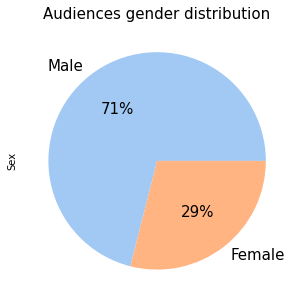

In [43]:
plt.figure(figsize=(8, 5))

plt.title('Audiences gender distribution', fontsize=15)

labels = ['Male', 'Female']
colors=sns.color_palette('pastel')[0:2]

df_user_use['Sex'].value_counts().plot.pie(colors=colors, labels=labels, textprops=textprops, autopct='%.0f%%')

plt.show()

We can see that all movies in the list attract **male much better than female (71% for male and 29% for female)**

### 3.3.3 Age Distribution

In the dataset of user, we found that the max age is **73** and the min age is **7**. So we split age with the gap of **10, into 8 groups**.


In [48]:
print("Min age:",df_user['Age'].min())
print("Max age:",df_user['Age'].max())

Min age: 7
Max age: 73


In [58]:
age = pd.cut(df_user['Age'], bins=8, right=True, labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])

In [64]:
age.value_counts().index

CategoricalIndex(['21-30', '31-40', '11-20', '41-50', '51-60', '61-70', '0-10',
                  '70+'],
                 categories=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'], ordered=True, dtype='category')

Text(0.5, 1.0, 'Pie chart')

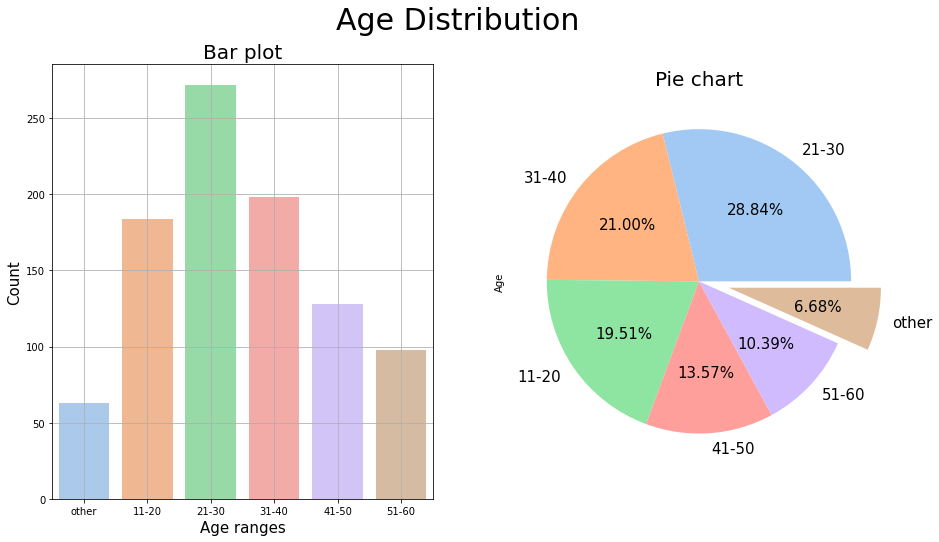

In [87]:
figs, axs = plt.subplots(1, 2, figsize=(15,8))
plt.suptitle('Age Distribution',fontsize=30)

#Bar plot
ax_1 = sns.barplot(ax=axs[0], x=age.value_counts().index, y=age.value_counts().values, palette=sns.color_palette('pastel')[0:9])
ax_1.set_title('Bar plot', fontsize=20)
ax_1.grid('on')
ax_1.set_xlabel('Age ranges', fontsize=15)
ax_1.set_ylabel('Count', fontsize=15)

#Pie plot -> make 0-10, 60-70, 70+ into the 'other' group
# age = age.replace({'0-10': 'other', 
#          '61-70': 'other', 
#          '70+': 'other'})

colors = sns.color_palette('pastel')[0:7]
ax_2 = age.value_counts().plot.pie(labels=age.value_counts().index, 
                                   colors=colors, 
                                   textprops=textprops, 
                                   autopct='%.2f%%',
                                  explode=[0,0,0,0,0,0.2])
ax_2.set_title('Pie chart', fontsize=20)

According to these two graphs, we found that audiences are aged mainly between 20-40. So we can roughly infer that movies in the list have more middle-aged movies.

In [75]:
age.value_counts()

21-30    272
31-40    198
11-20    184
41-50    128
51-60     98
other     63
Name: Age, dtype: int64

## <h3 align="center"> © Haozhe TANG 04.2023. All rights reserved. <h3/>